**Questions that will be answered:**<br>
What communities are building more housing units?<br>
Which ones are losing housing units?<br> 
<br>
**Method**<br>
Take in all the data from Property assessments (2004-2024). For each year, group the data by its zip code (mail city), count the housing units within that code area. Compare the growth for each area within 20 years.<br>
<br>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Limit search only in City of Boston
neighborhood_zip_codes = {
    "Allston/Brighton": ["02134", "02135", "02163"],
    "Back Bay/Beacon Hill": ["02108", "02116", "02117","02123", "02133", "02199", "02216", "02217", "02295"],
    "Central Boston": ["02101", "02102", "02103", "02104", "02105", "02106", "02107", "02109", "02110", "02111", "02112", "02113", "02114", "02196", "02201", "02202", "02203", "02204", "02205", "02206", "02207", "02208", "02209", "02211", "02212", "02222", "02293"],
    "Charlestown": ["02129"],
    "Chestnut Hill": ["02467"],
    "Dedham": ["02026"],
    "Dorchester": ["02122", "02124", "02125"],
    "East Boston": ["02128", "02228"],
    "Fenway/Kenmore": ["02115", "02215"],
    "Hyde Park": ["02136"],
    "Jamaica Plain": ["02130"],
    "Mattapan": ["02126"],
    "Newton": ["02458"],
    "Readville": ["02137"],
    "Roslindale": ["02131"],
    "Roxbury": ["02119", "02121"],
    "Roxbury Crossing": ["02120"],
    "South Boston": ["02127", "02210"],
    "South End": ["02118"],
    "West Roxbury": ["02132"]
}

#Need for later visualization
neighborhood_zip_code_combinations = []
for neighborhood, zip_codes in neighborhood_zip_codes.items():
    for zip_code in zip_codes:
        combination = f"{neighborhood} ({zip_code})"
        neighborhood_zip_code_combinations.append(combination)

In [69]:
#Preprocess the given data
processed_data_dict = {}

def zip_to_neighborhood(zip_code):
    for neighborhood, zips in neighborhood_zip_codes.items():
        if zip_code in zips:
            return f"{neighborhood} ({zip_code})"
    return None

def process_csv(file_path, neighborhood_zip_codes):
    #read in csv file
    df = pd.read_csv(file_path)
    content = file_path.split('.')[0]
    year = content.split('_')[2]
    
    if year == '2005':
        #df['ZIPCODE'] = np.nan
        df['ZIPCODE'] = df['PTYPE']
    #Rename columns to "MAIL_ZIP" if variations are found
    col_names_to_check = ['ZIPCODE', 'ZIP_CODE']
    for col_name in col_names_to_check:
        if col_name in df.columns:
            df.rename(columns={col_name: 'ZIPCODE'}, inplace=True)
            break
            

            
    #Fix some of the zip codes
    df['ZIPCODE'] = df['ZIPCODE'].astype(str).apply(lambda x: x.split('.')[0])
    df['ZIPCODE'] = df['ZIPCODE'].str.replace('_', '')
    df['ZIPCODE'] = df['ZIPCODE'].astype(str).str.zfill(5) 
    
    #filter the data (leave only data in city of Boston)
    all_zips = [zip_code for zip_list in neighborhood_zip_codes.values() for zip_code in zip_list]
    df = df[df['ZIPCODE'].isin(all_zips)]
    df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)
    
    #group the data
    grouped_data = df.groupby('neighborhood').size()
    
    return df, grouped_data

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


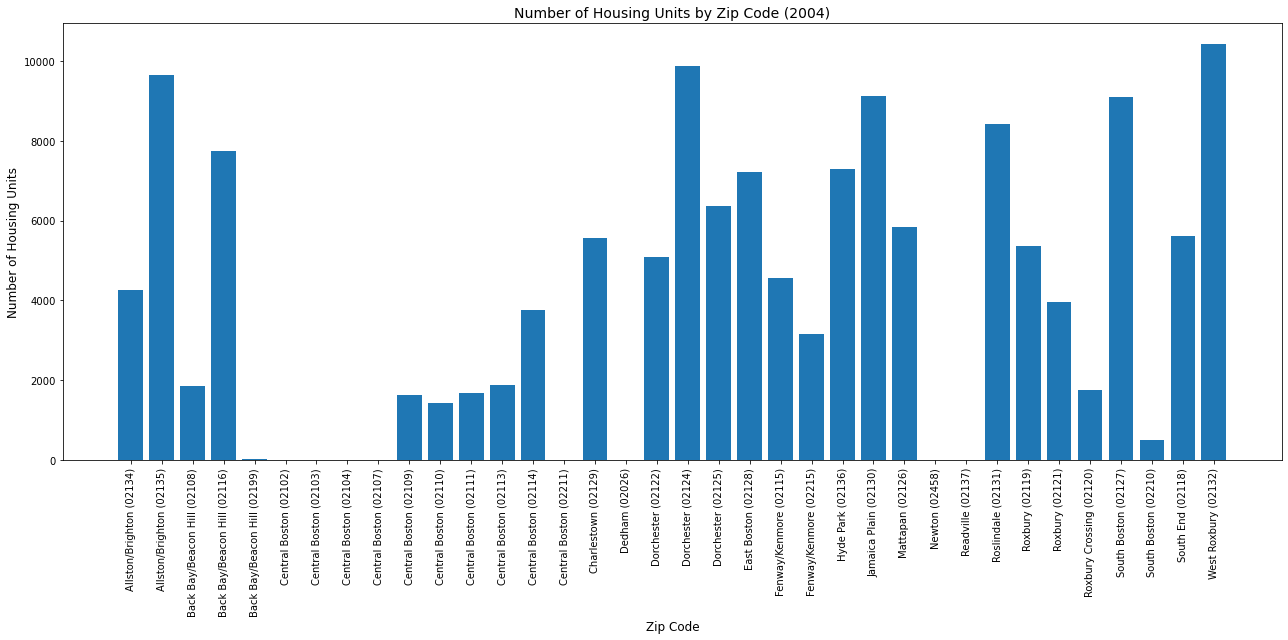

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


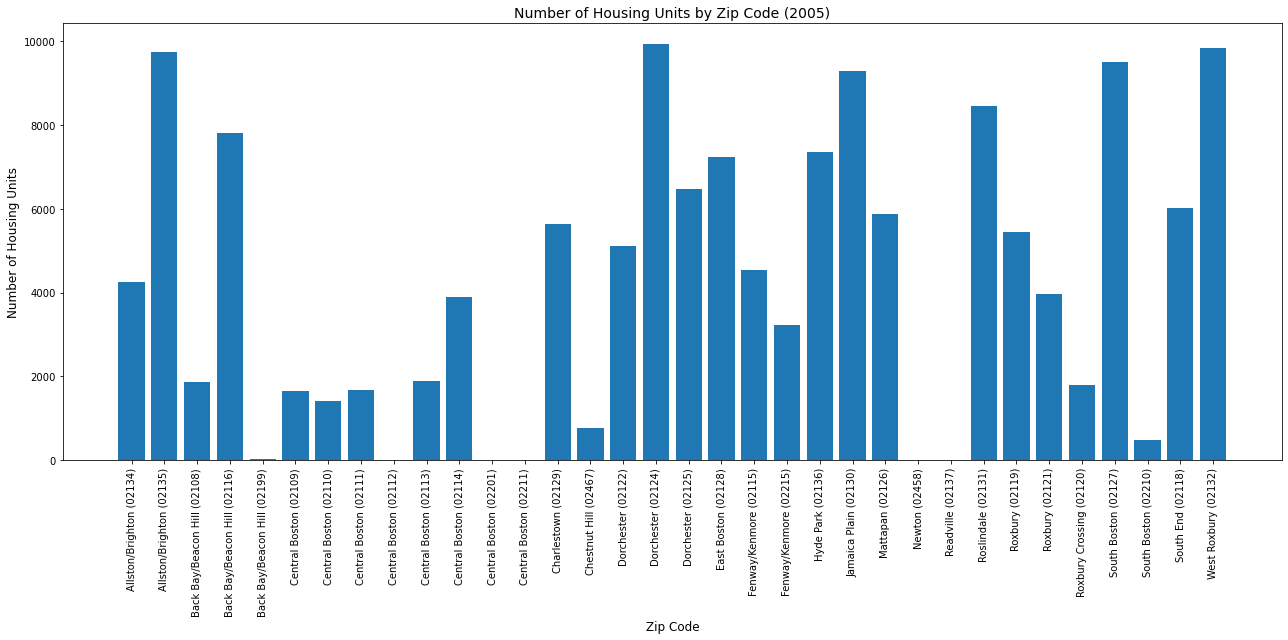

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


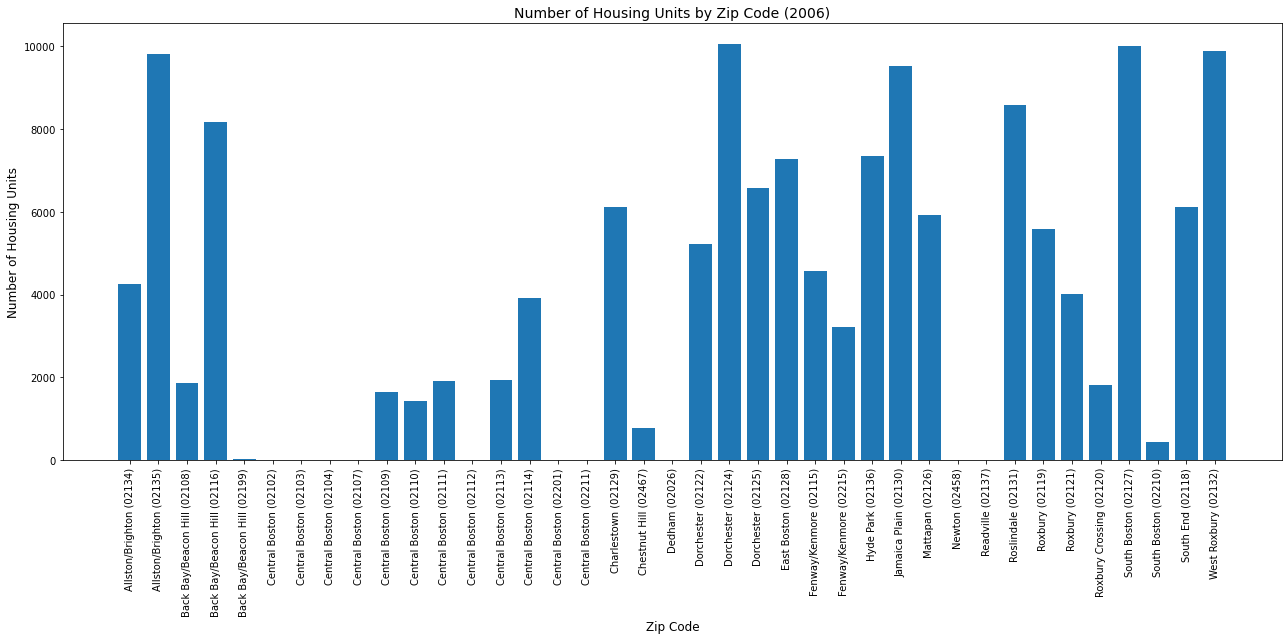

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


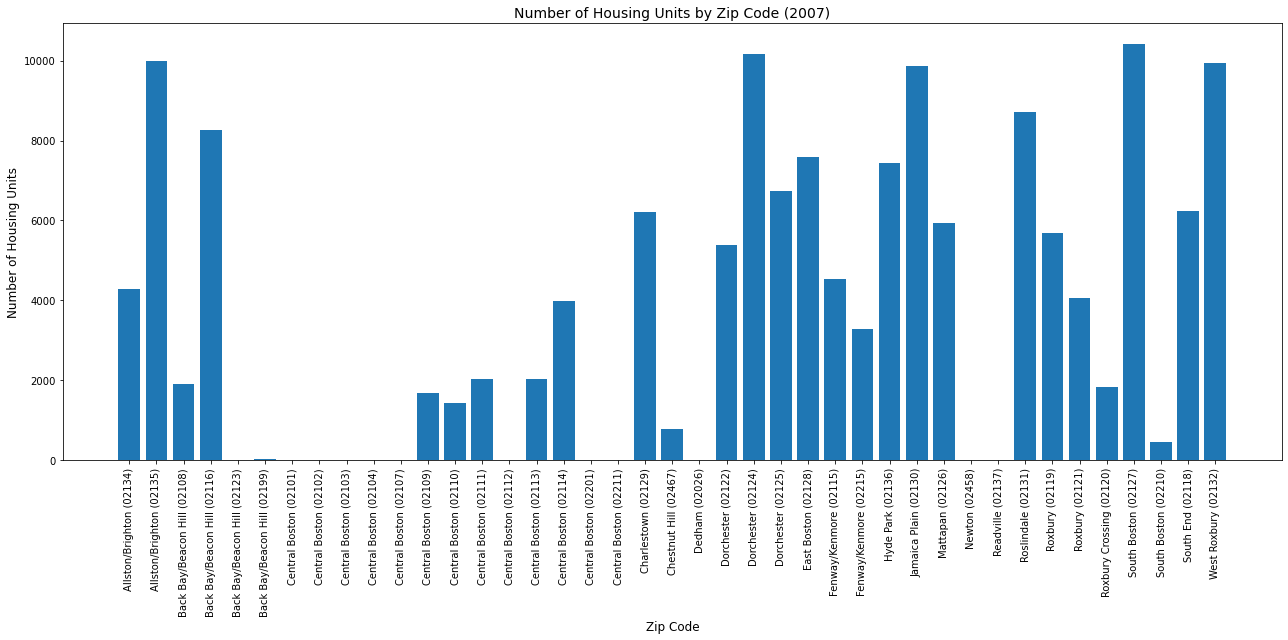

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


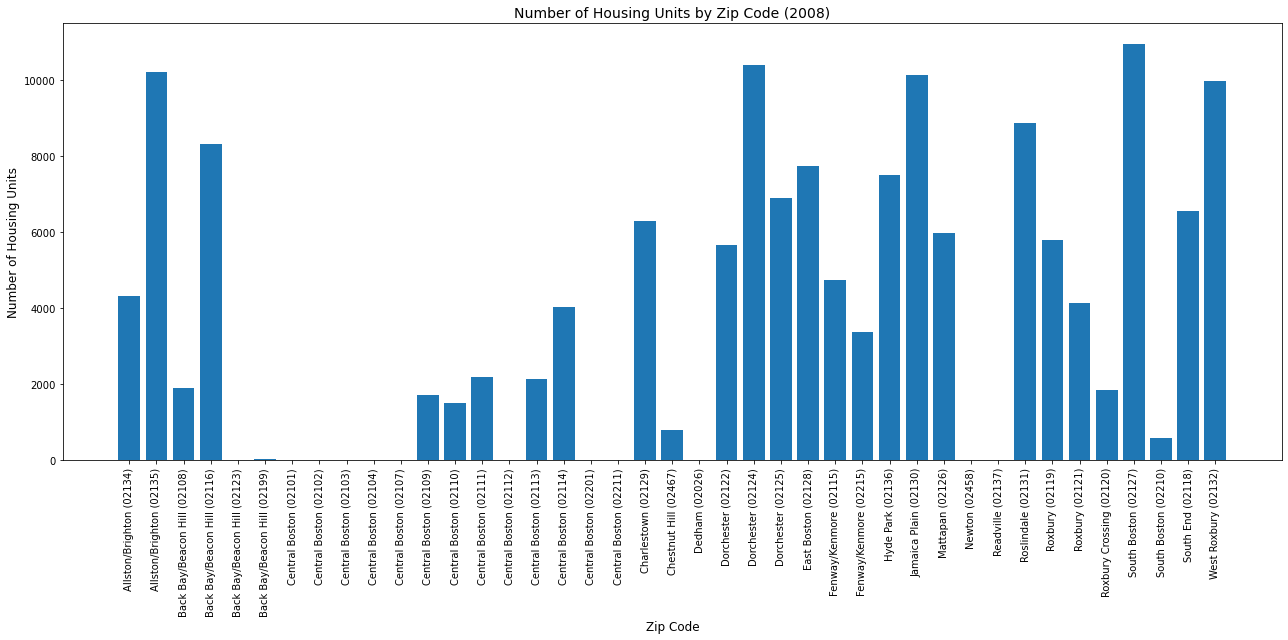

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


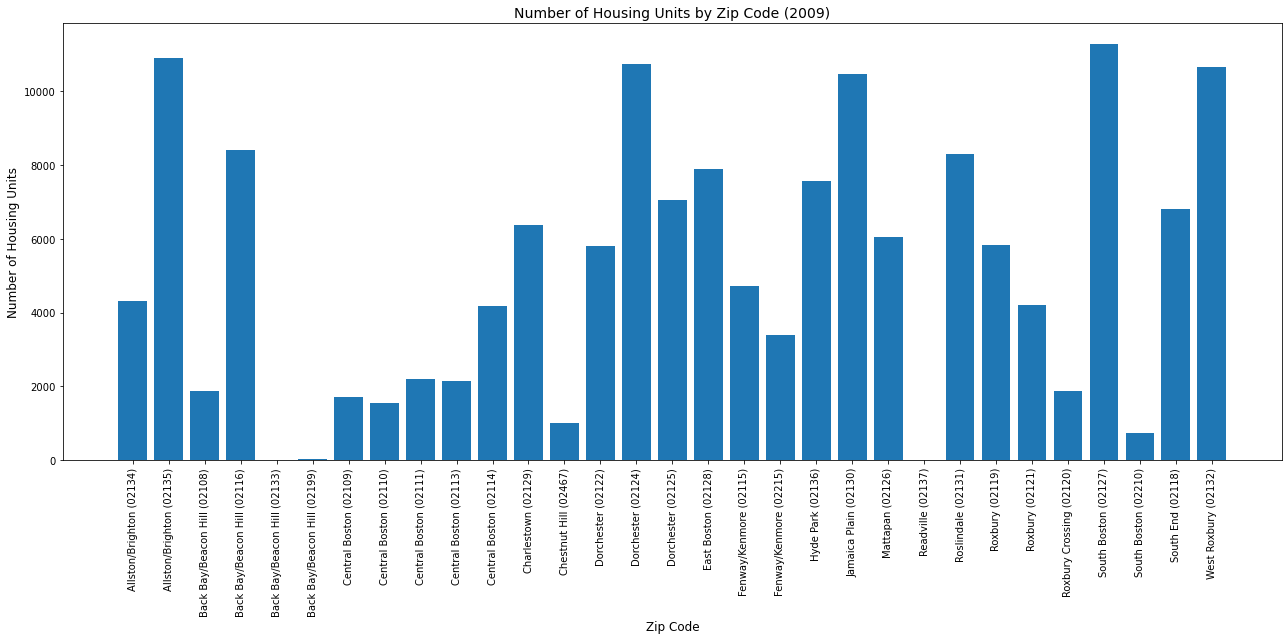

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


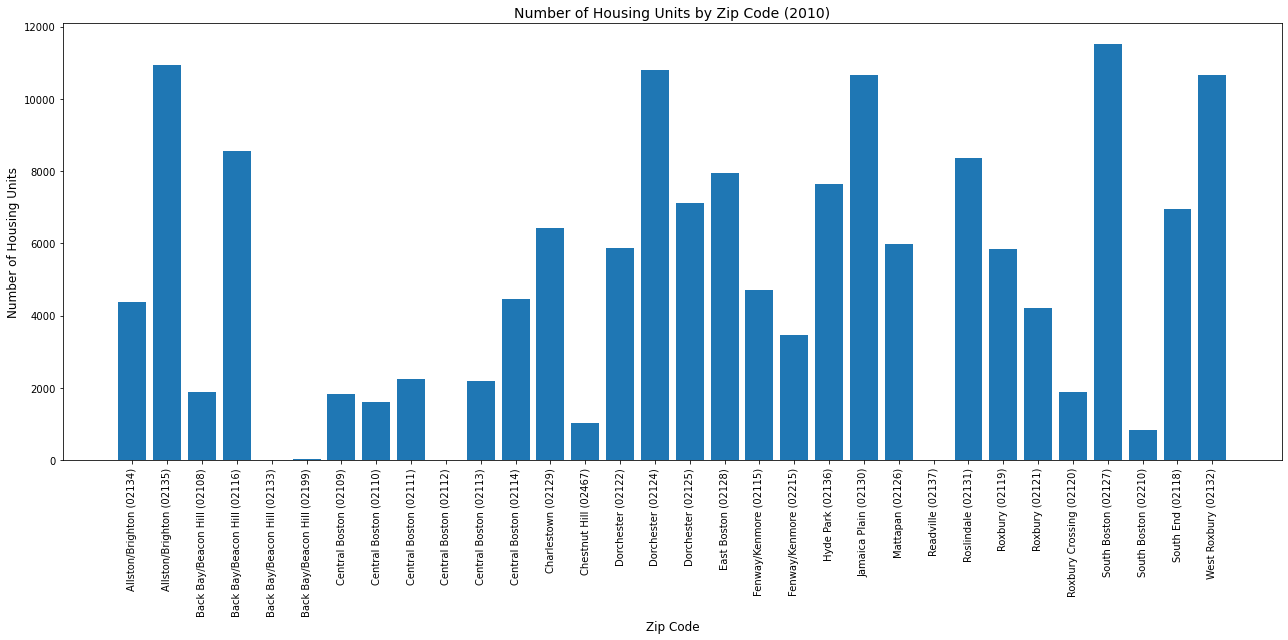

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (14,26,27,28,34,35,38,42,45,46,49,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


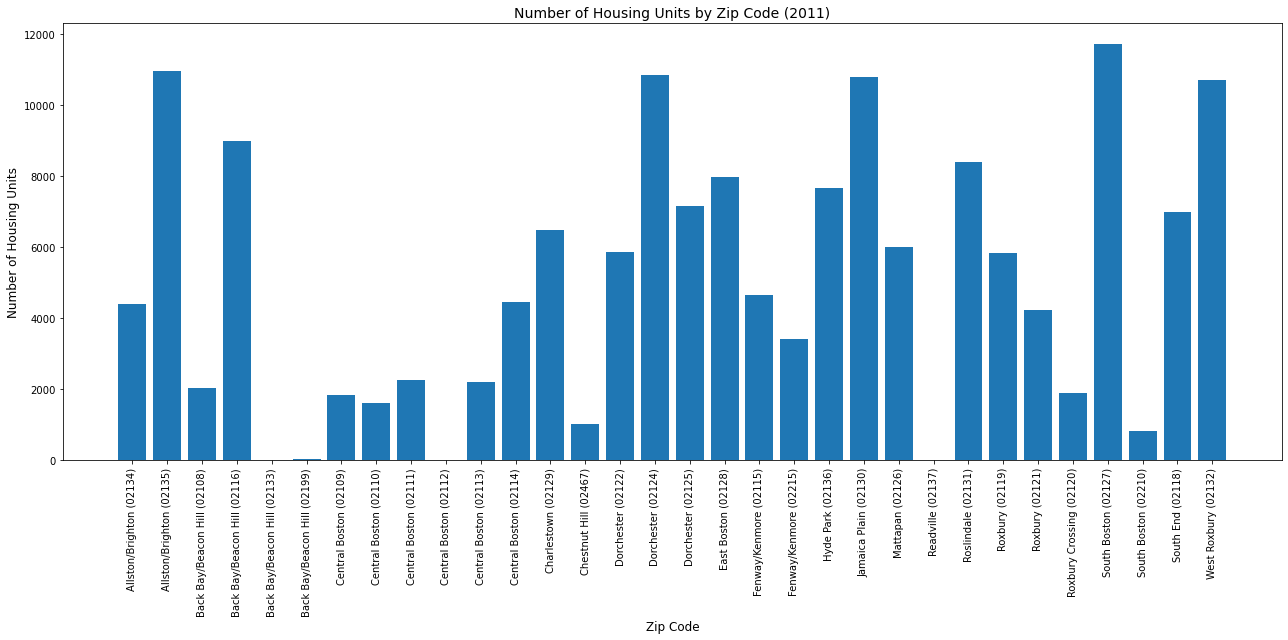

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (14,43,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


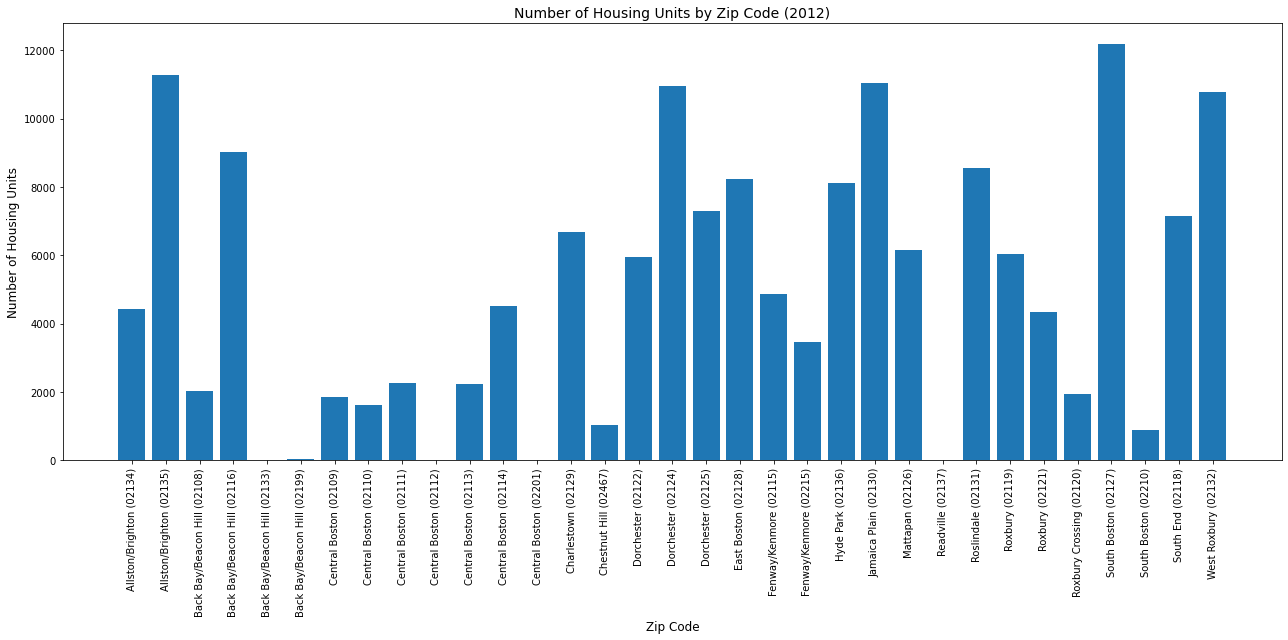

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (14,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


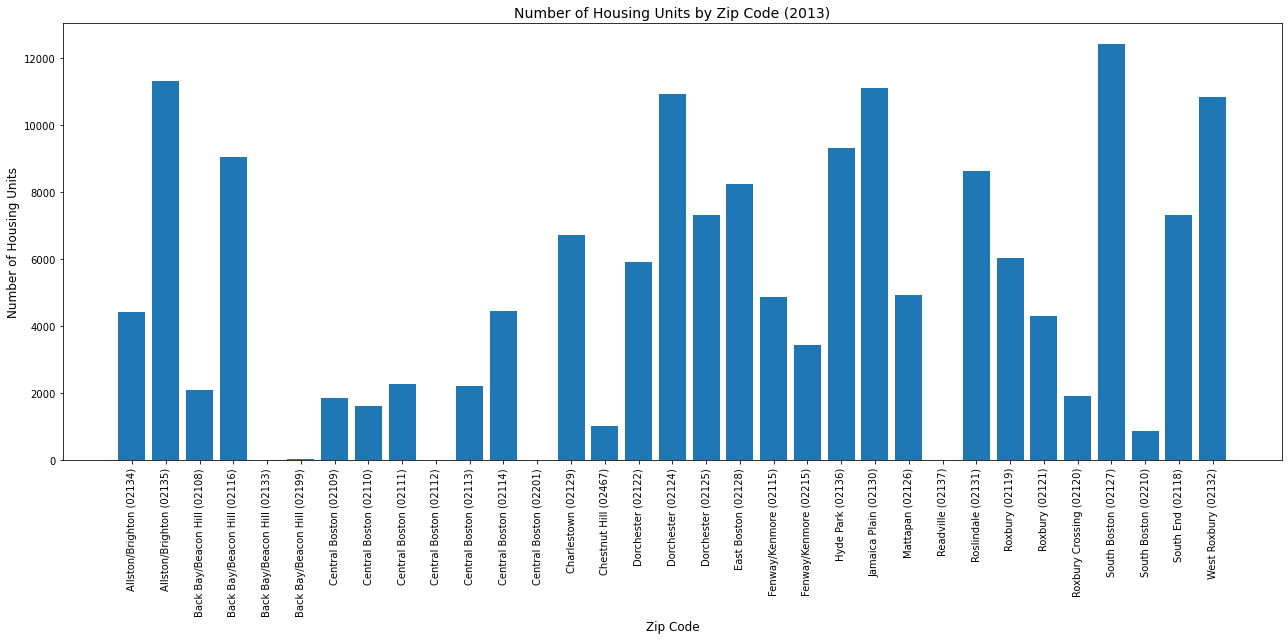

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


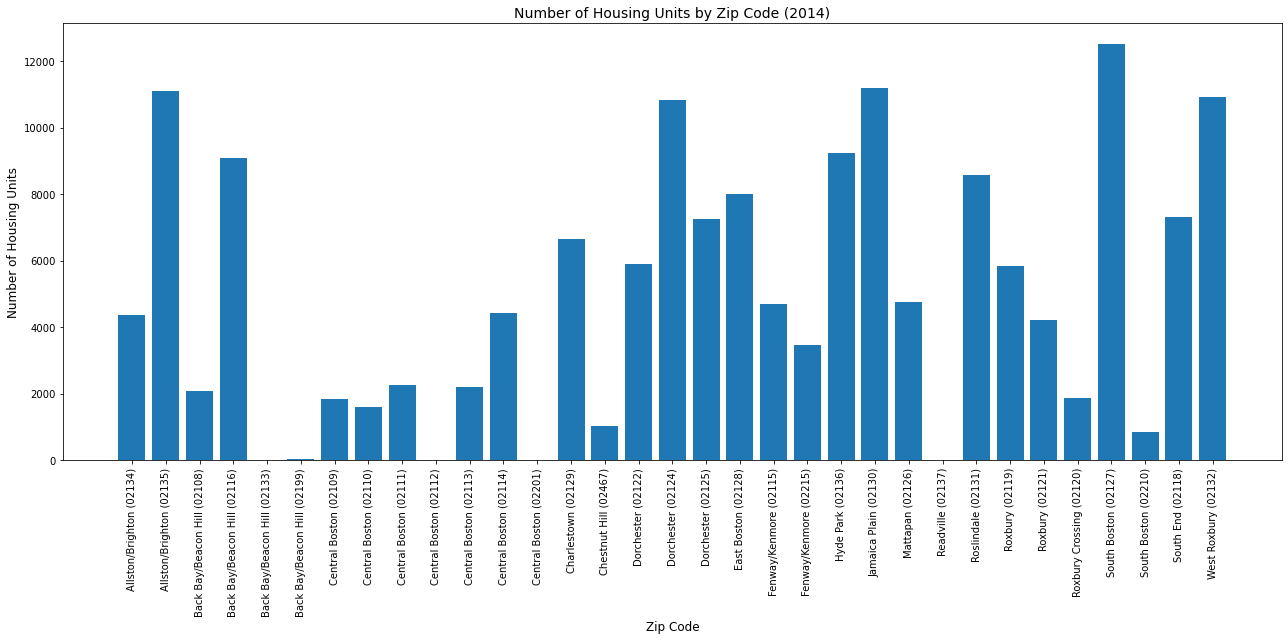

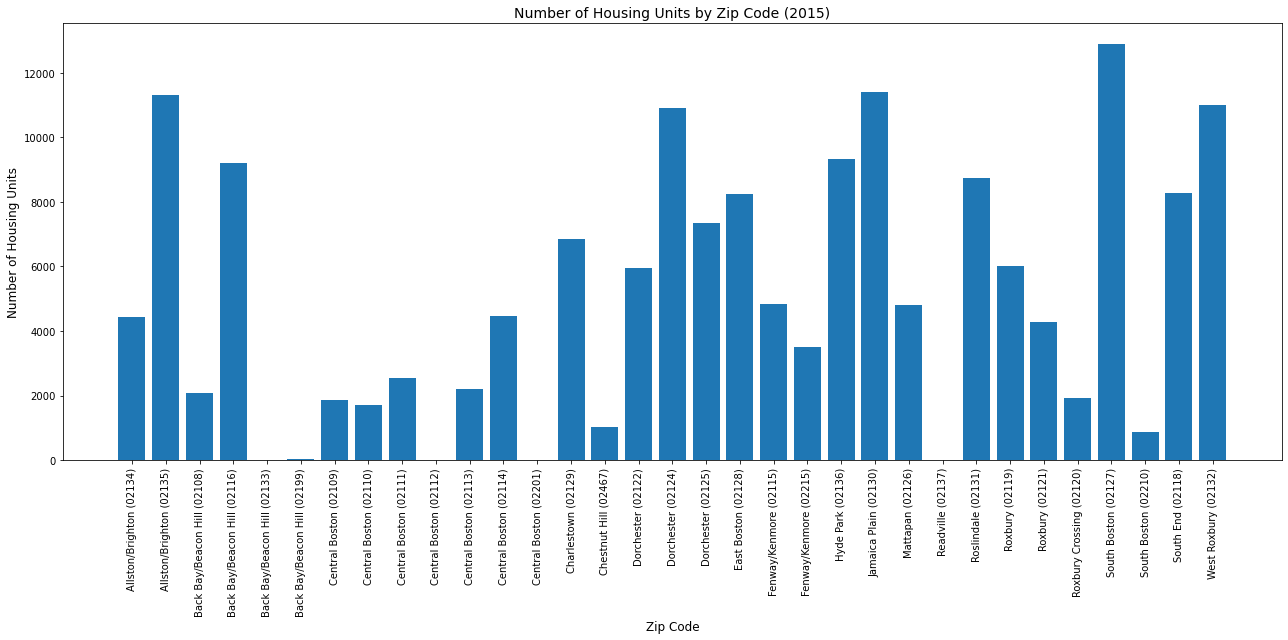

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


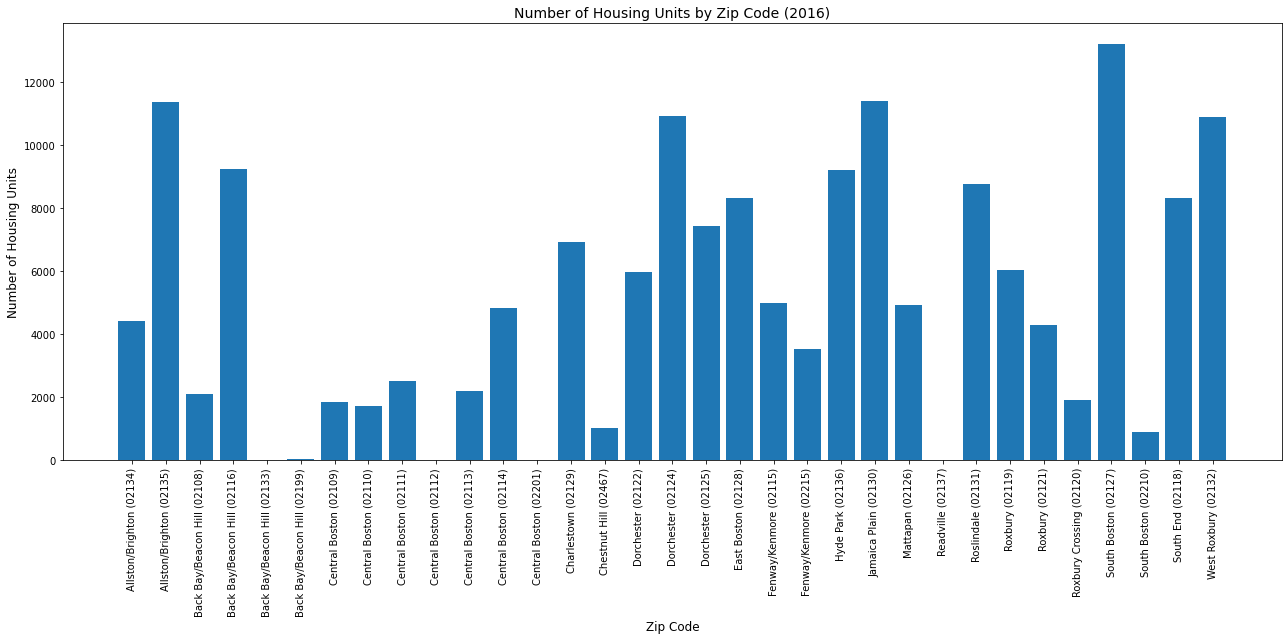

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


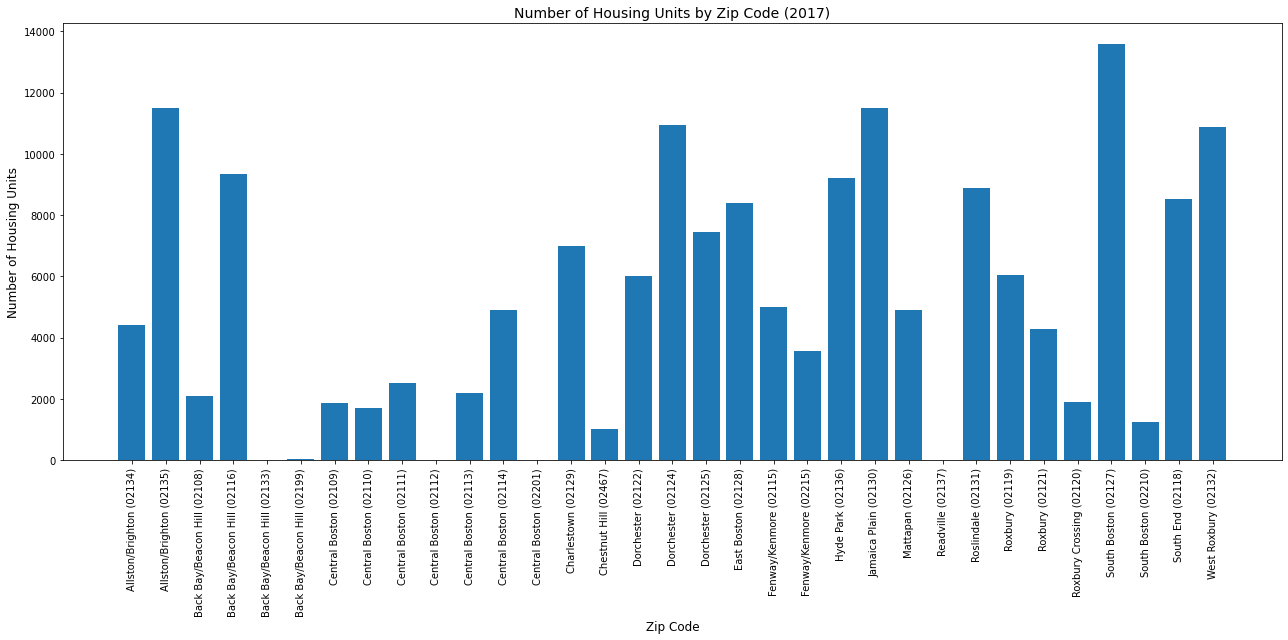

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (16,61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


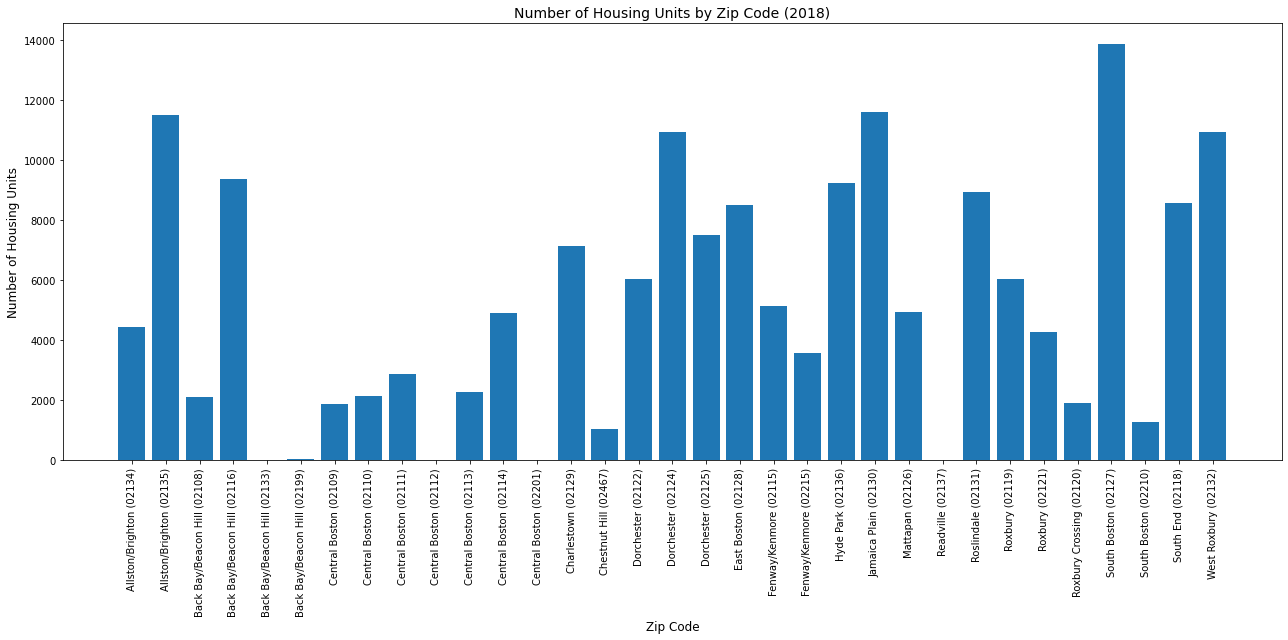

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (16,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


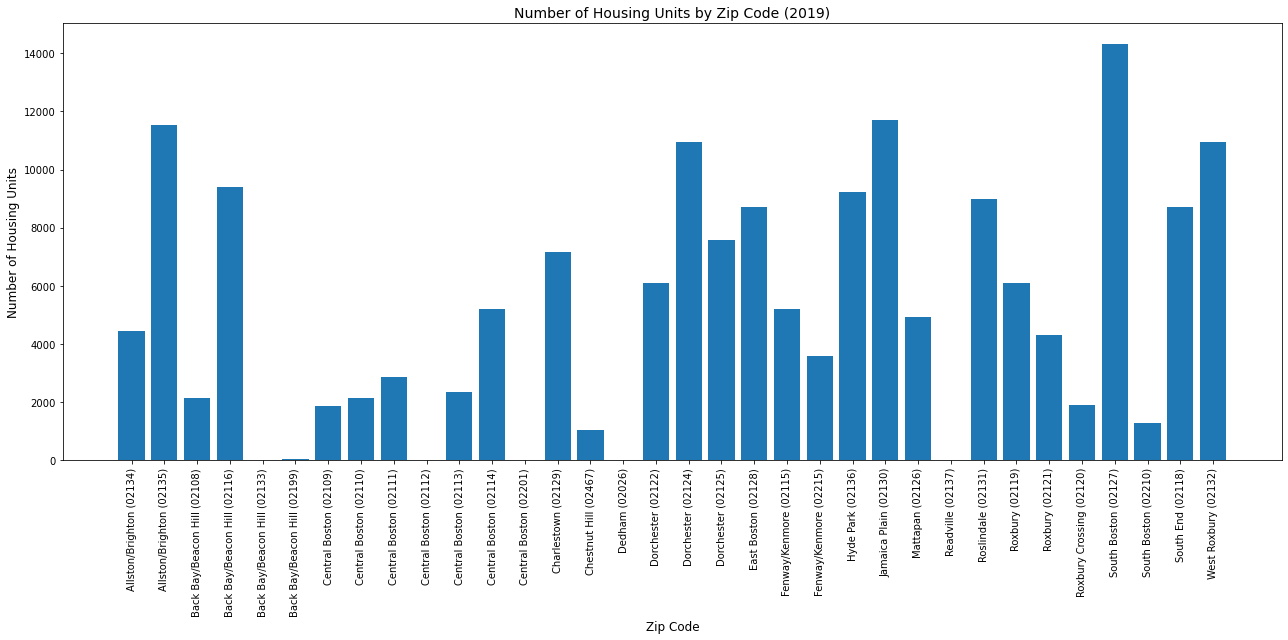

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (7,16,28,29,30,35,36,37,38,39,40,41,42,43,45,46,47,48,49,59,60,65,66,67,68,69,70,71,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


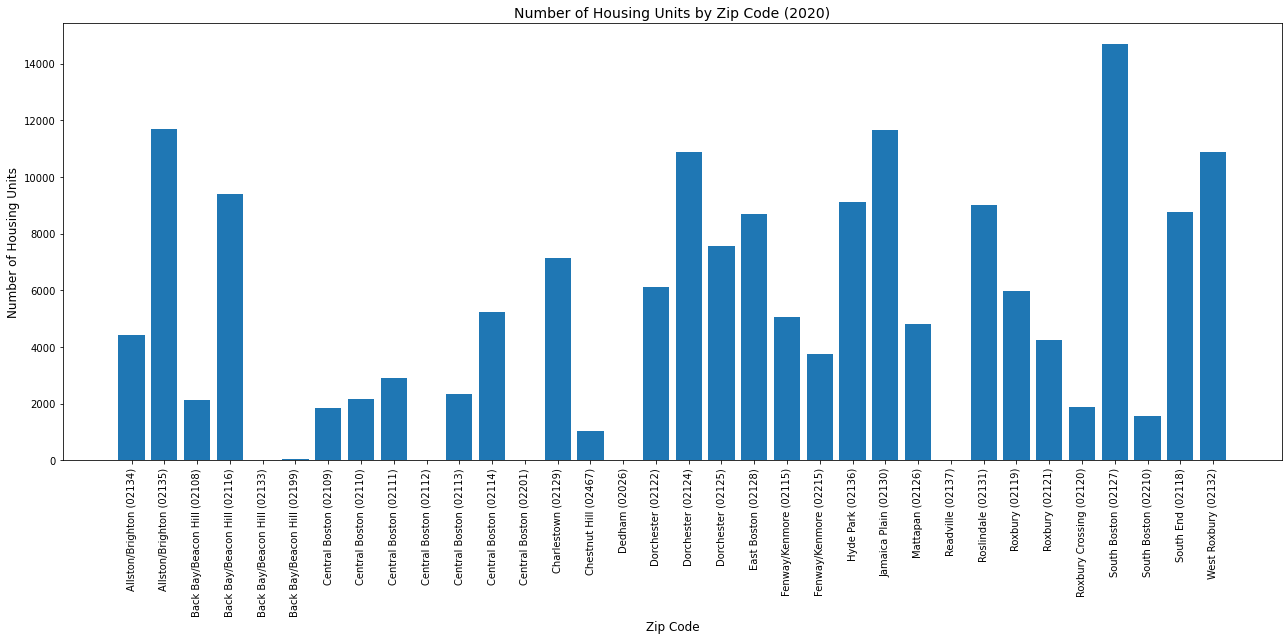

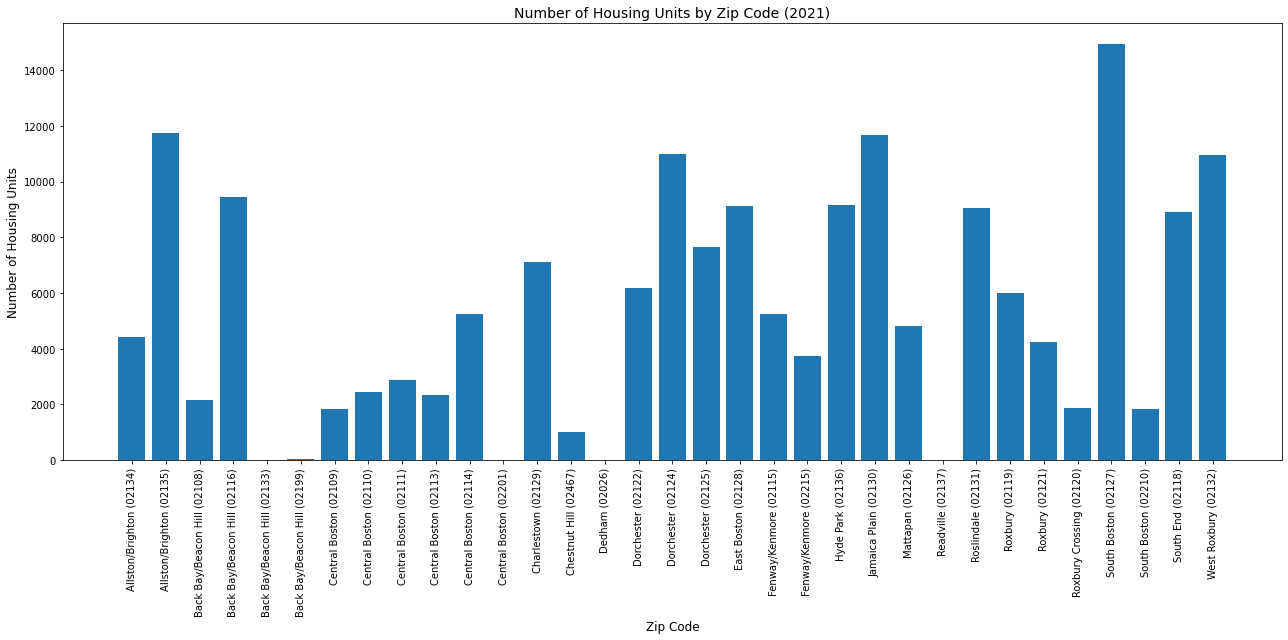

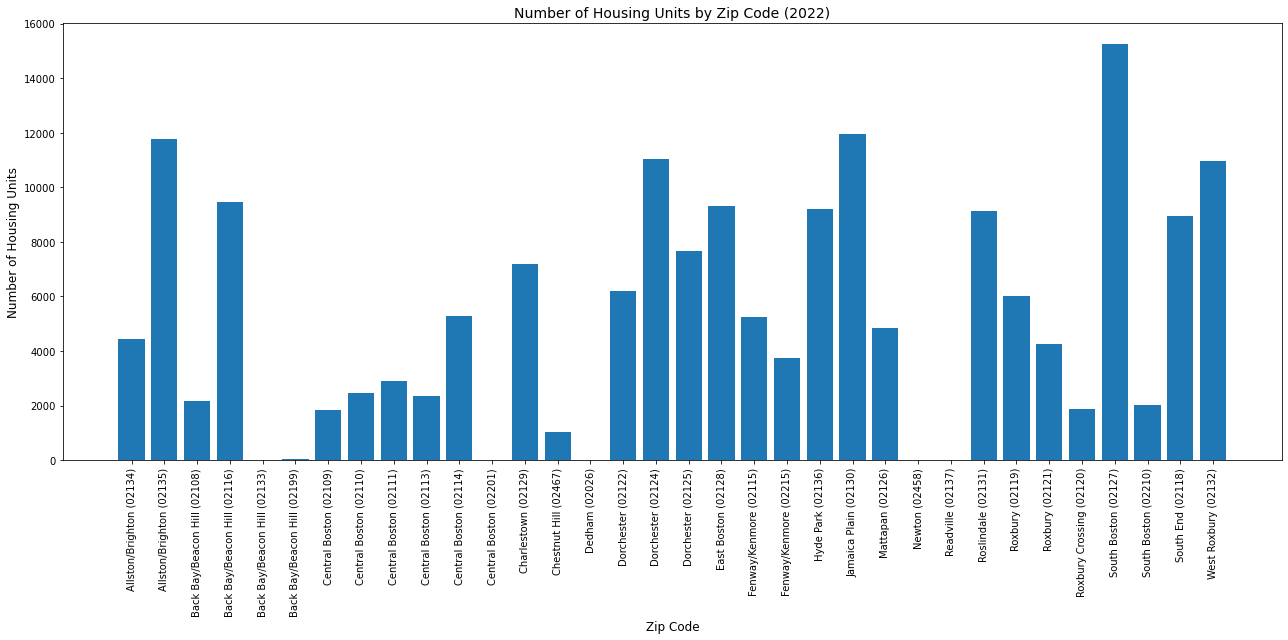

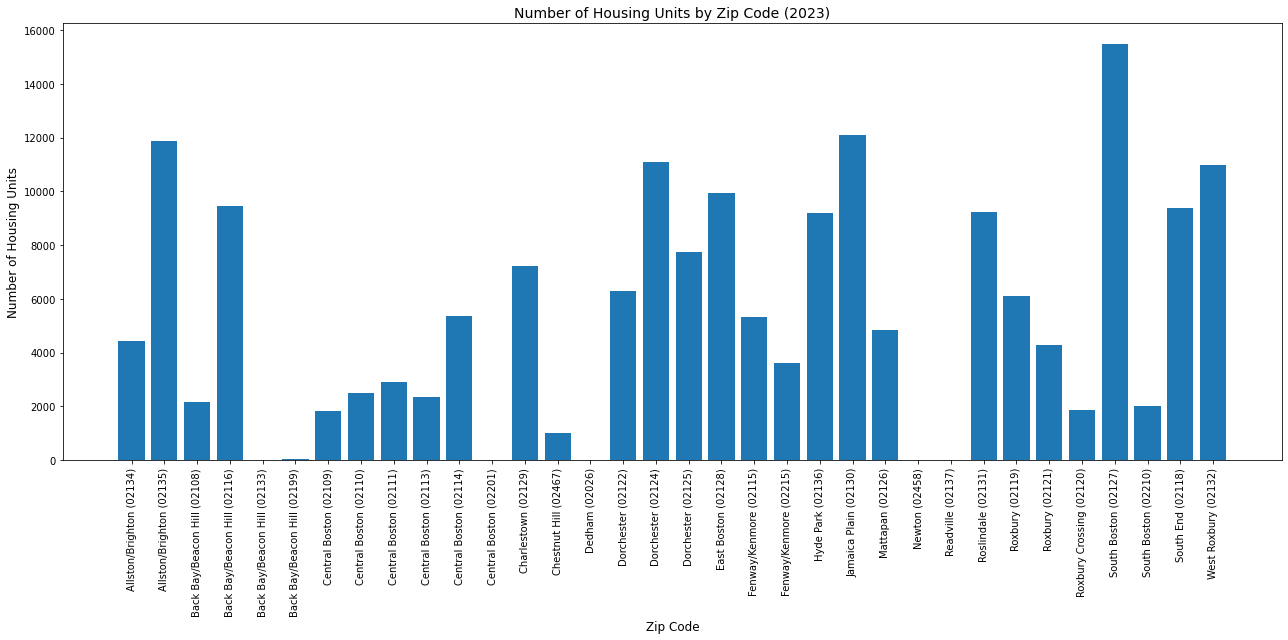

/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/79/qkhvxsqx1fq0zg1q2xh3f7y40000gn/T/ipykernel_9914/520274528.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood'] = df['ZIPCODE'].apply(zip_to_neighborhood)


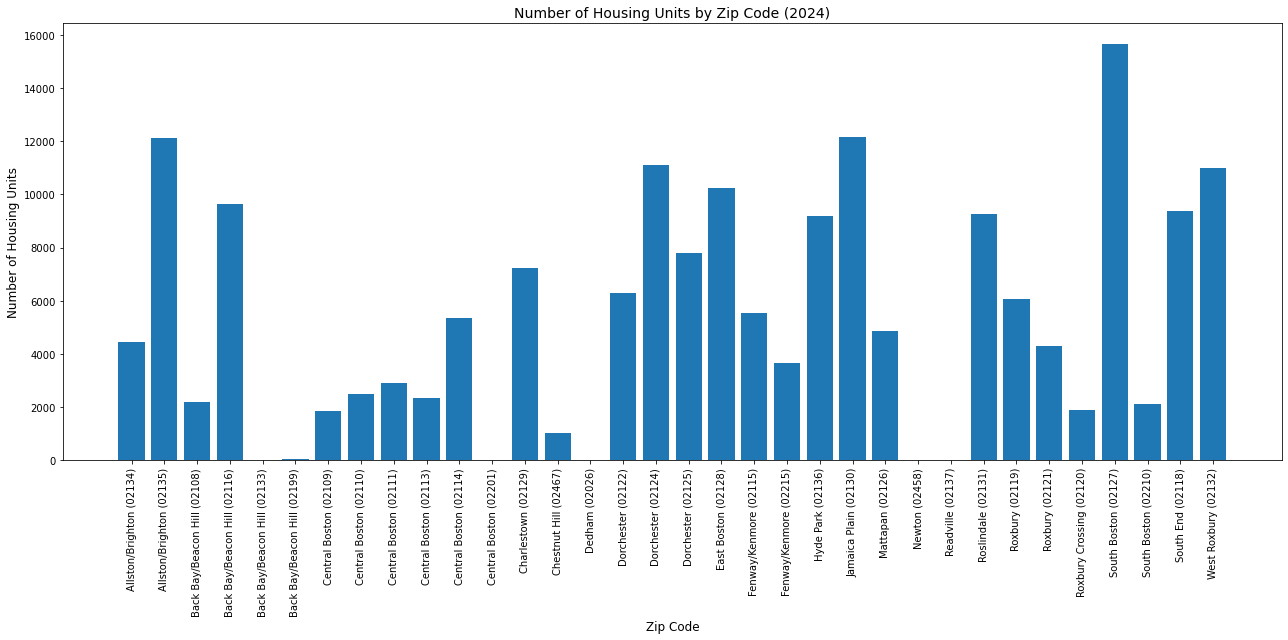

In [71]:
#plot the graph (2004-2024)
for year in range(2004, 2025):
    
    file_path = f'property_assessment_{year}.csv'
    df, grouped_data = process_csv(file_path, neighborhood_zip_codes)
    
    #store the data for further analysis
    stored_data = df.groupby('neighborhood').size().reset_index(name='units')
    processed_data_dict[year] = stored_data.values.tolist()

    plt.figure(figsize=(18, 9))
    plt.bar(grouped_data.index, grouped_data.values)
    plt.xlabel('Zip Code', fontsize=12)
    plt.ylabel('Number of Housing Units', fontsize=12)
    plt.title(f'Number of Housing Units by Zip Code ({year})', fontsize=14)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

In [72]:
#Create a new dictionary
#key = combination of neighborhood and zip code (ex. Central Boston (02101))
#items = number of housing units from 2004-2024
neighborhood_zip_code_changes = {}

for combination in neighborhood_zip_code_combinations:
    changes = []
    
    neighborhood, zip_code = combination.split('(')
    zip_code = zip_code[:-1]
    
    for year in range(2004, 2025):
        #get corresponding data from processed_data_dict
        data = processed_data_dict.get(year, [])
            
        #find matching item
        units = 0
        for item in data:
            if item[0] in combination:
                units = item[1]
                #add to list
                changes.append(units)
                break
        else:
            #dealing with unmatched case
            changes.append(units)
            
            
                
    neighborhood_zip_code_changes[combination] = changes

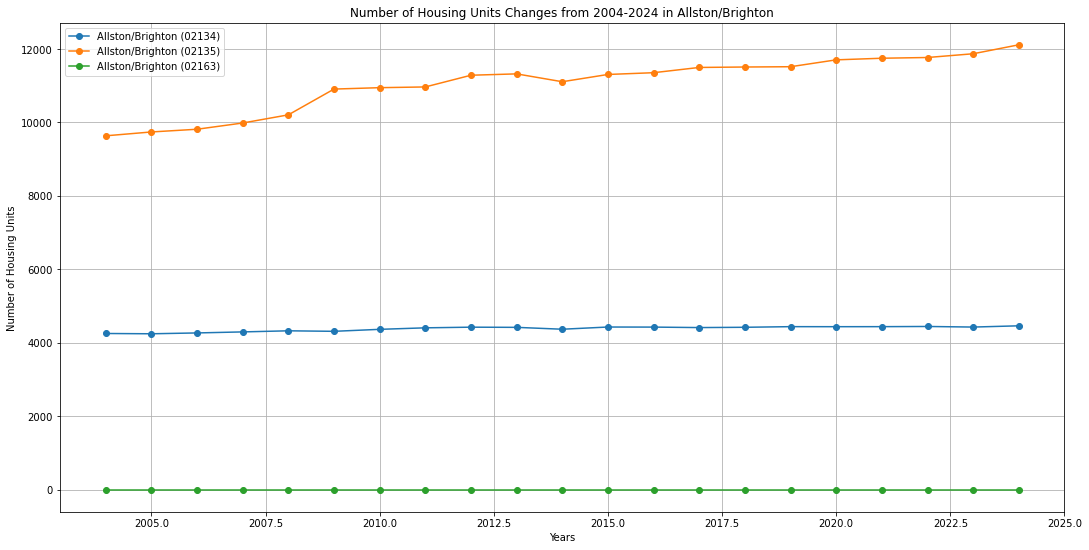

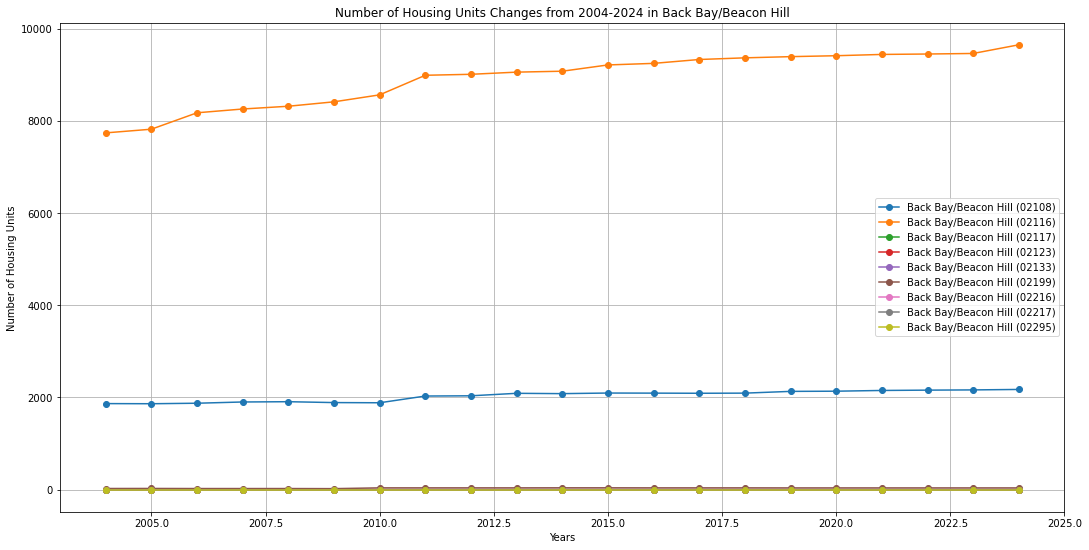

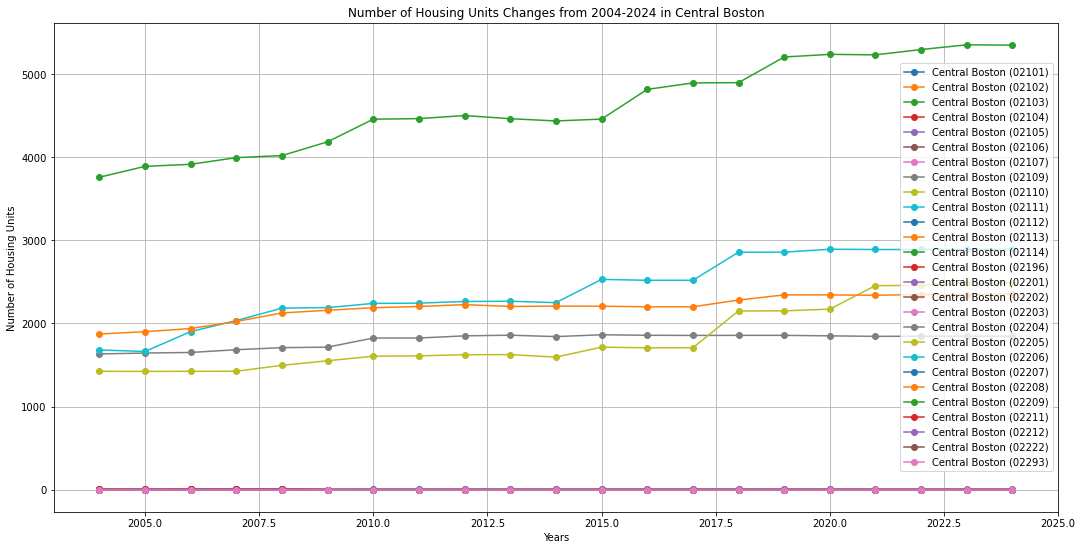

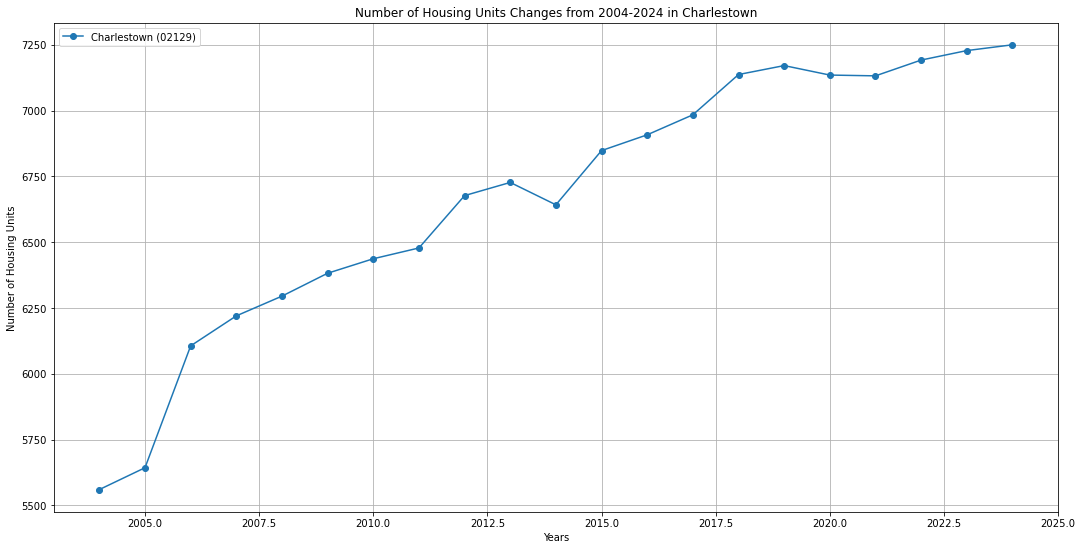

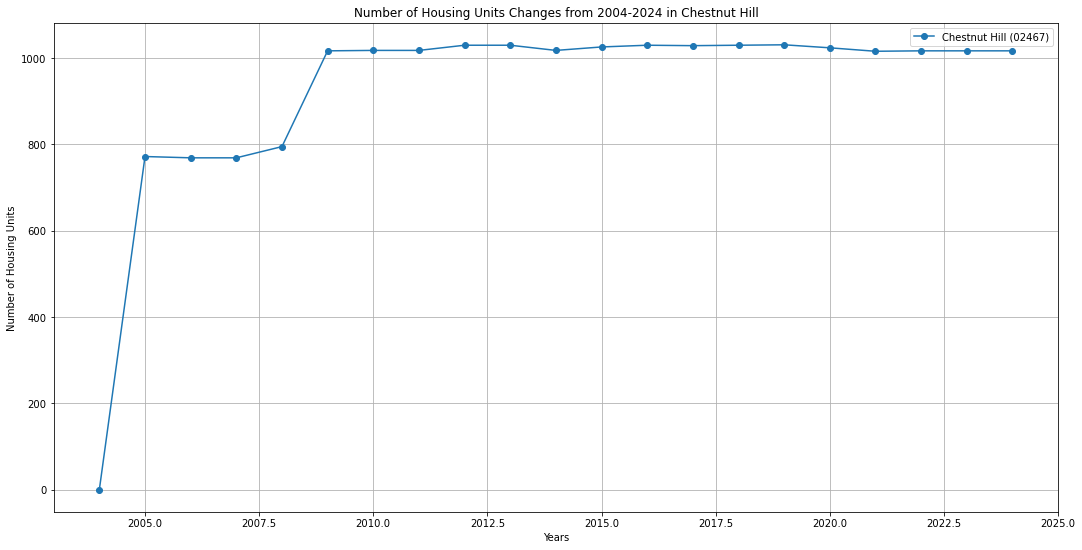

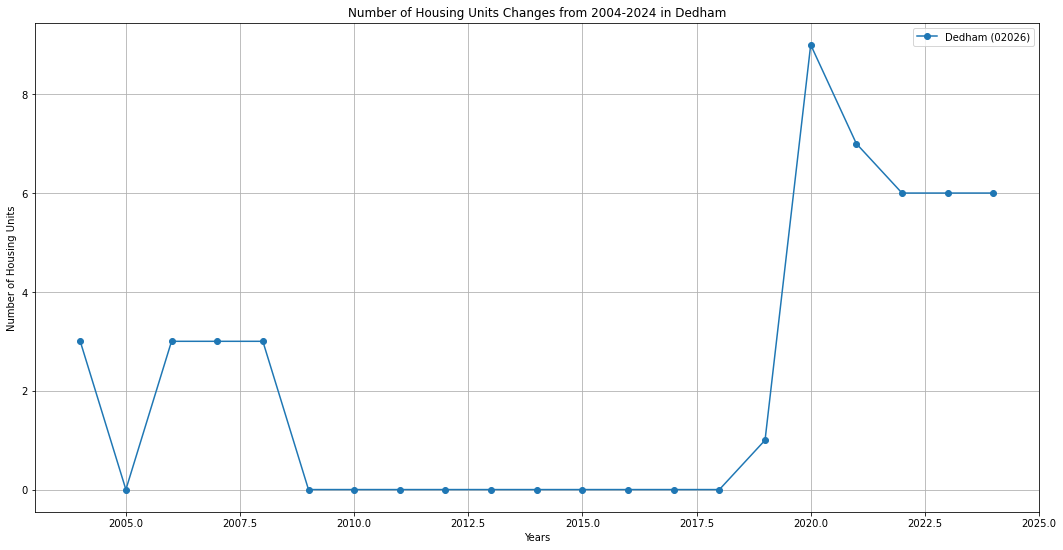

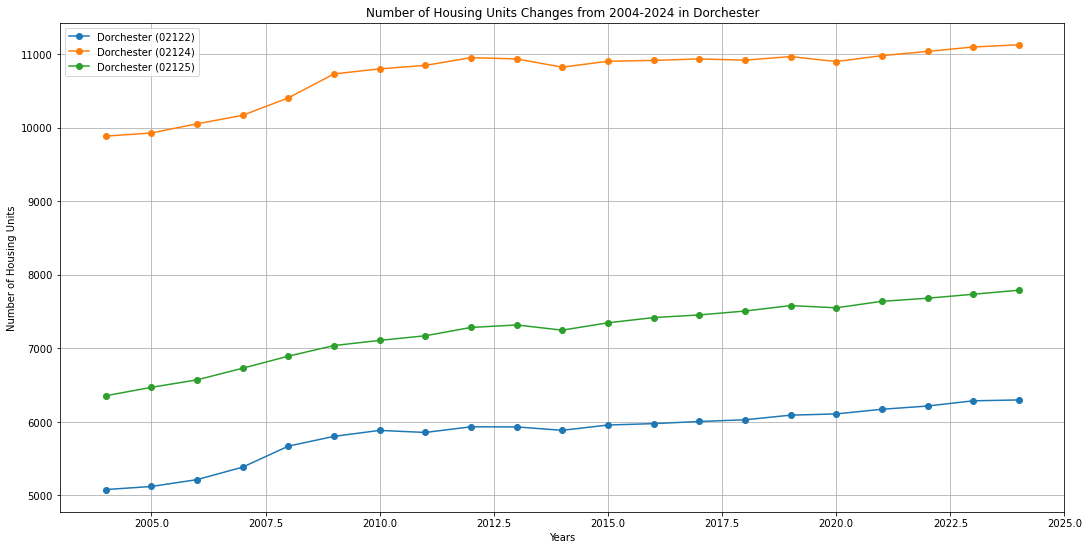

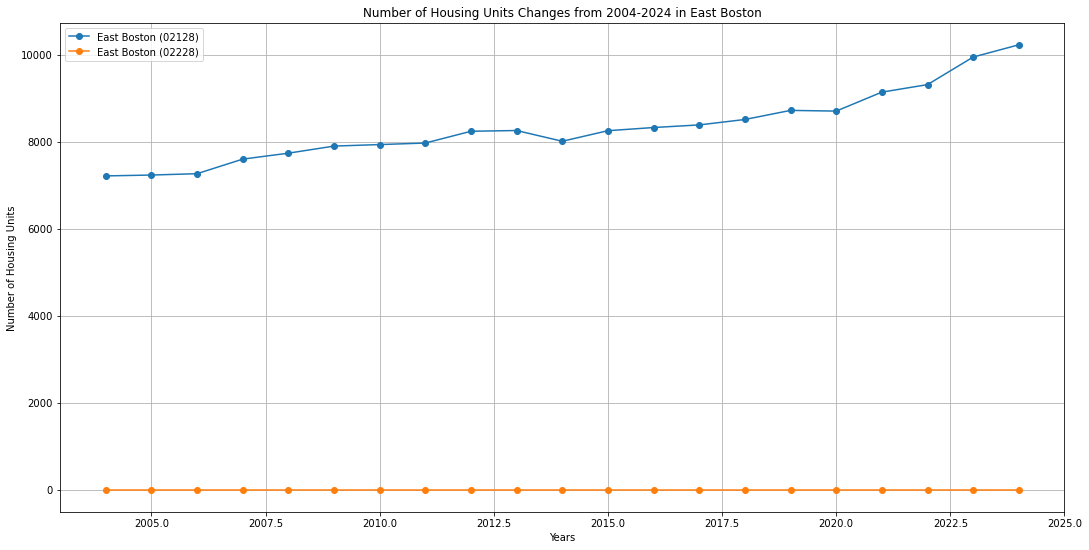

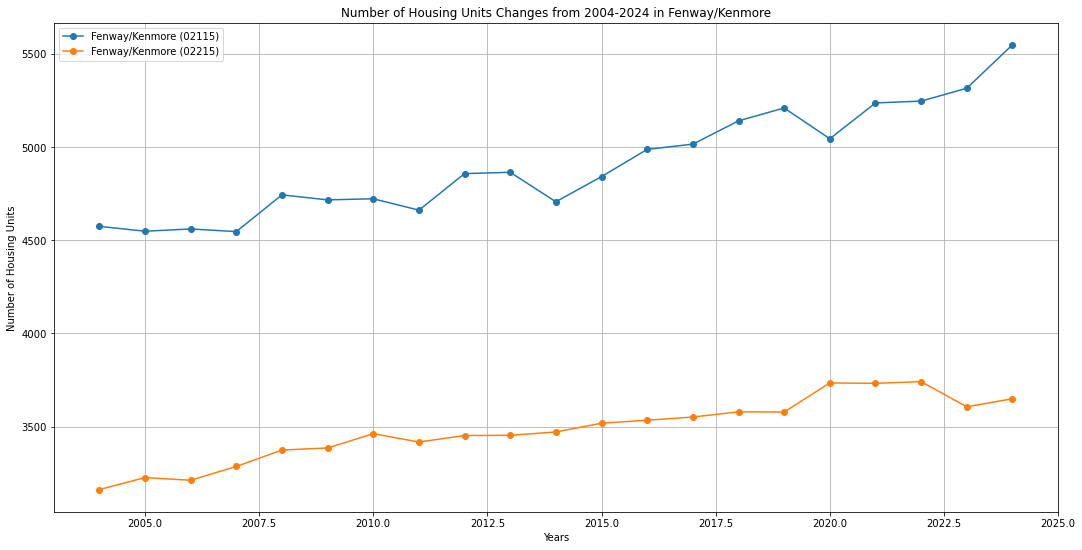

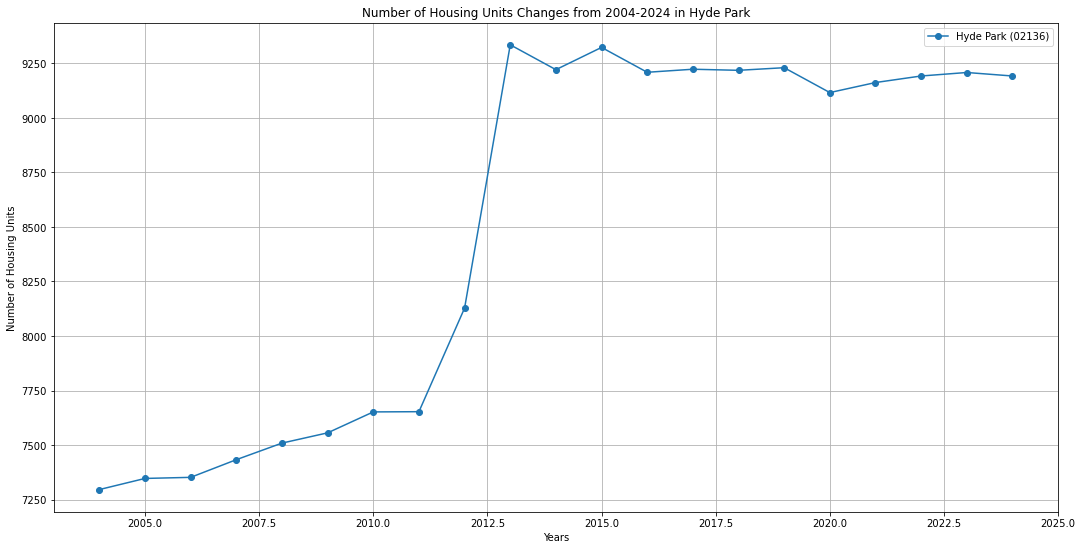

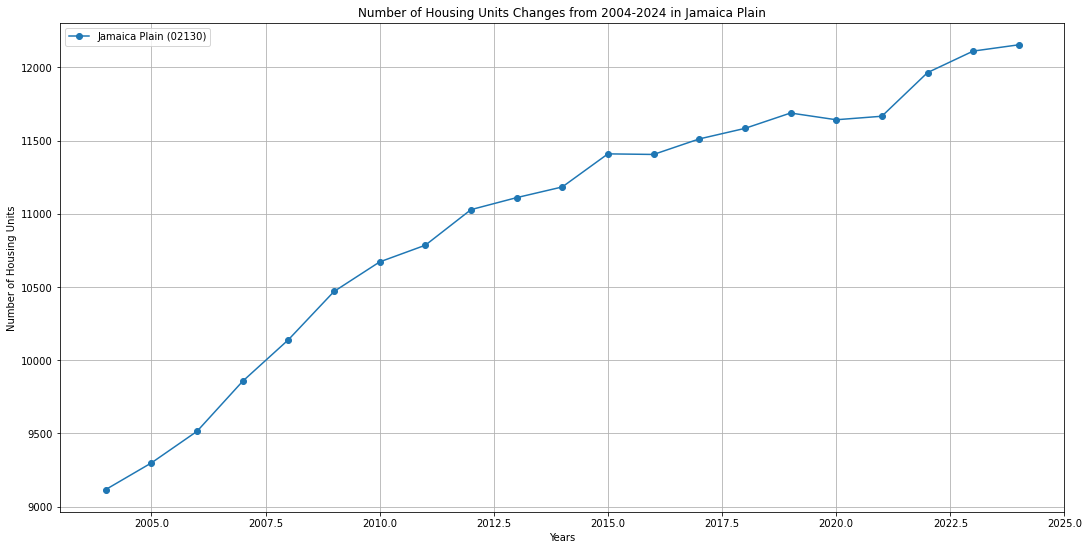

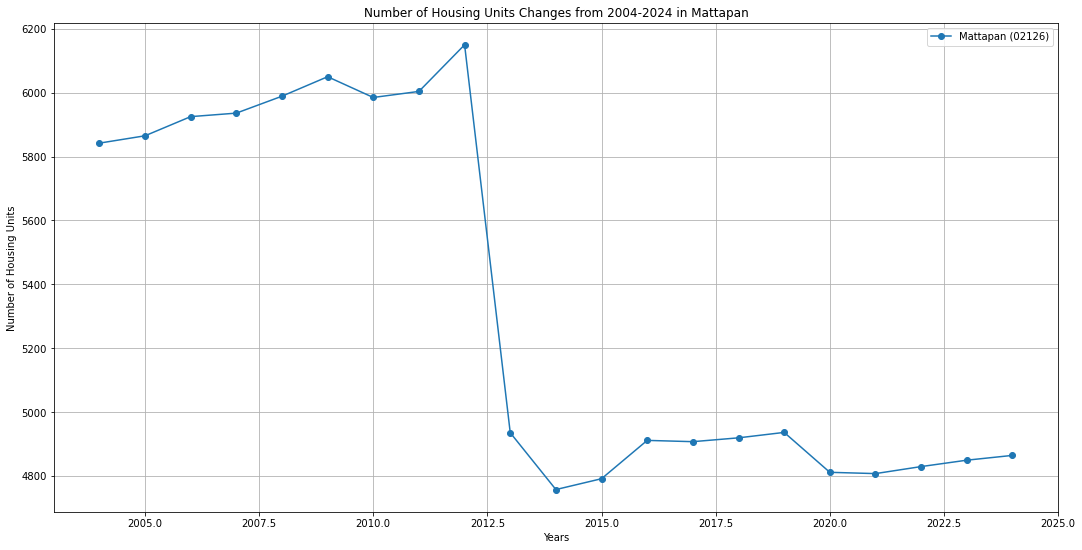

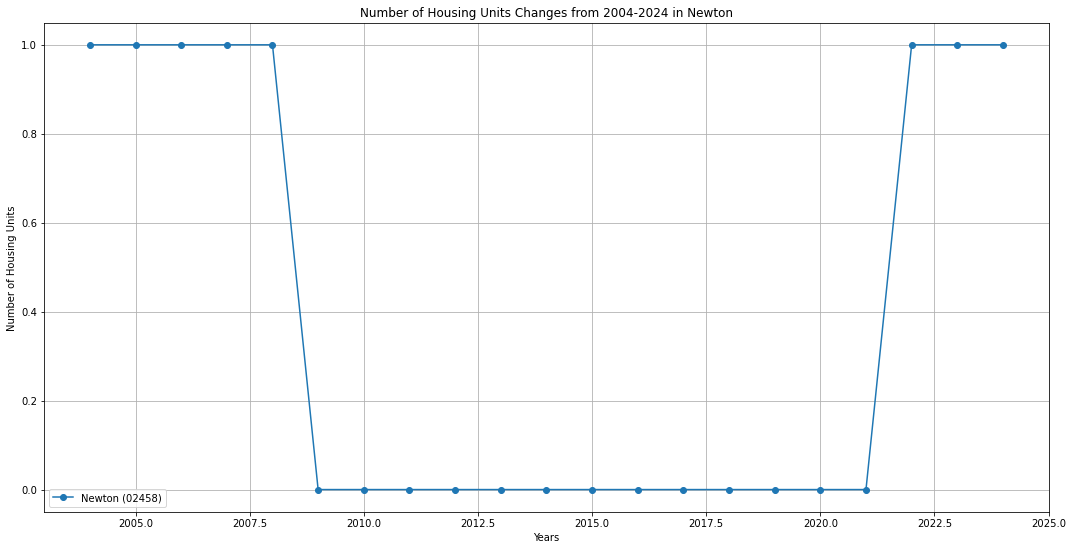

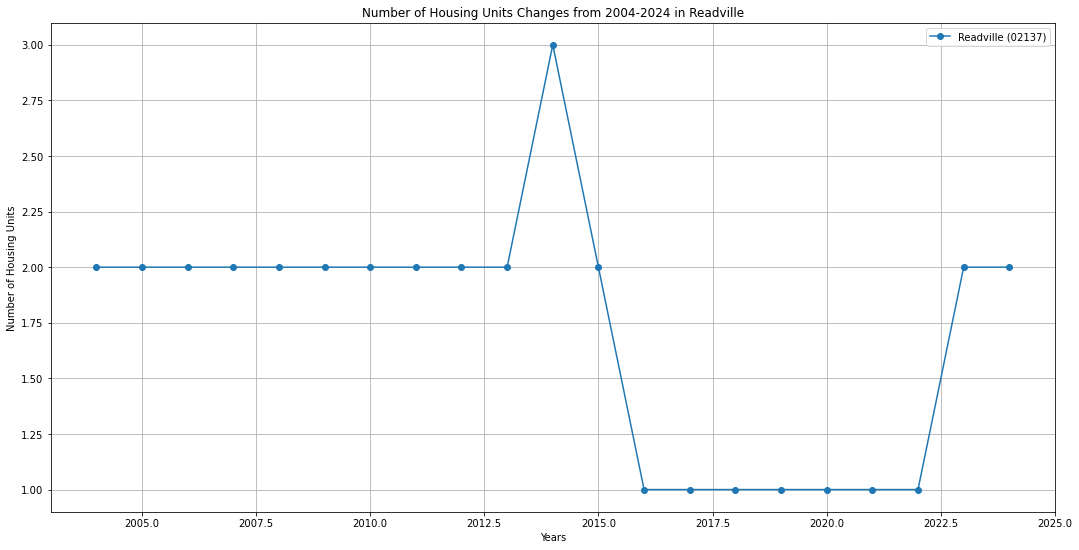

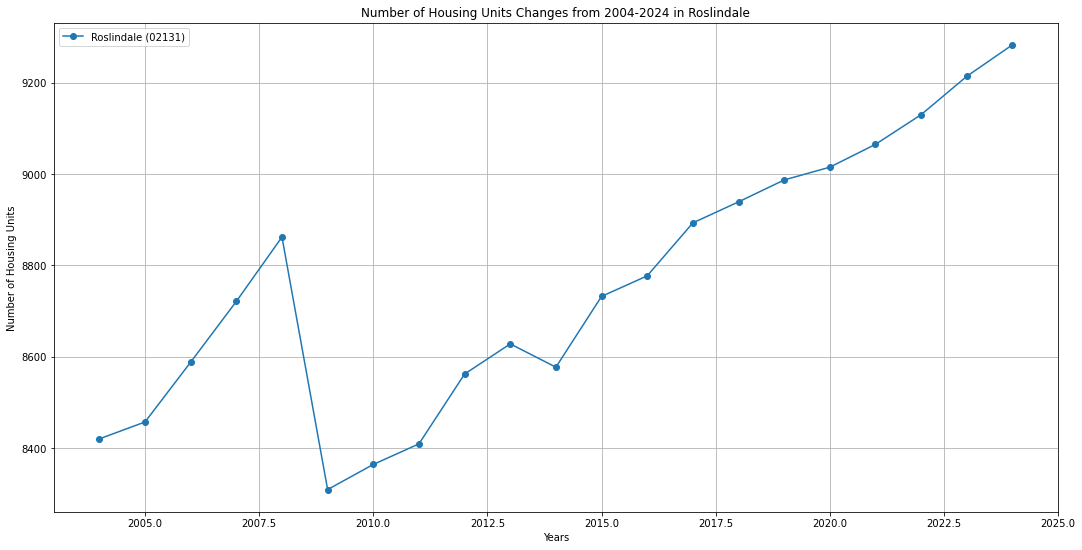

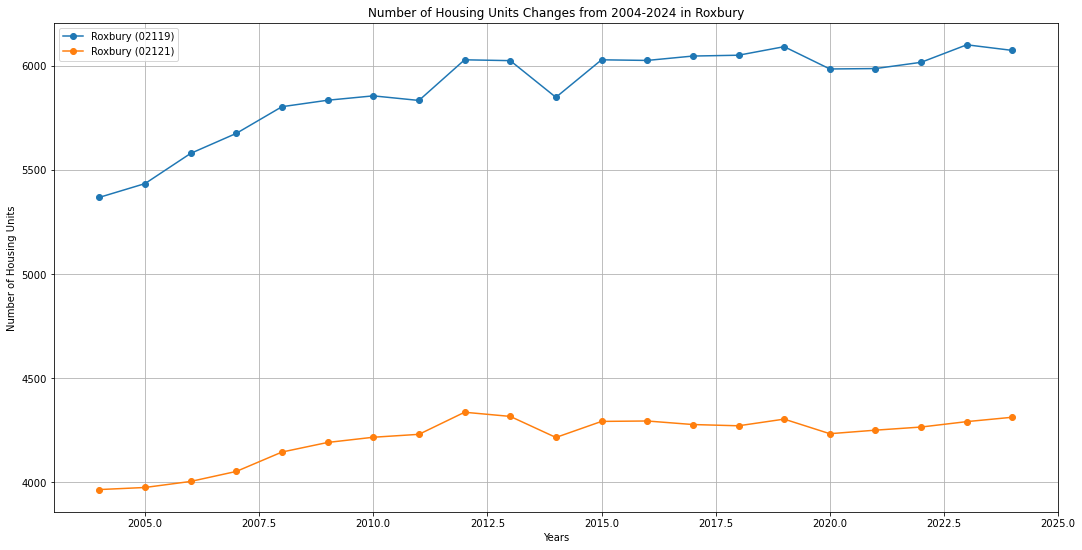

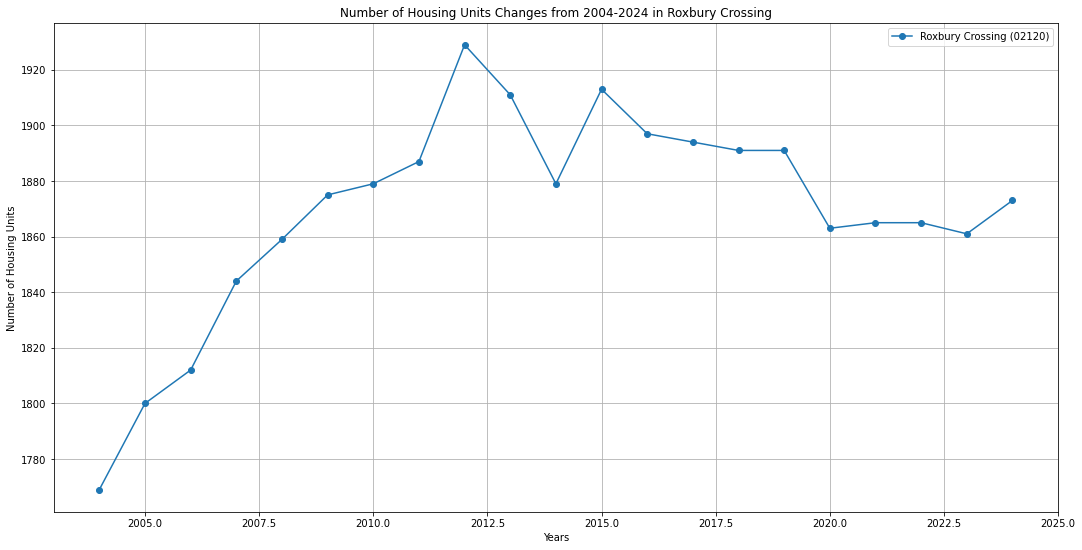

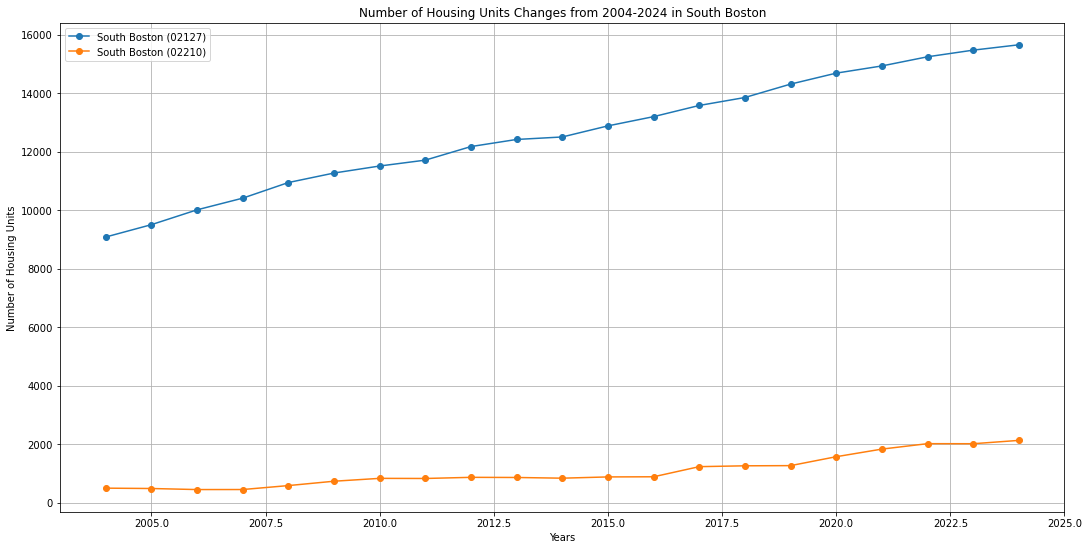

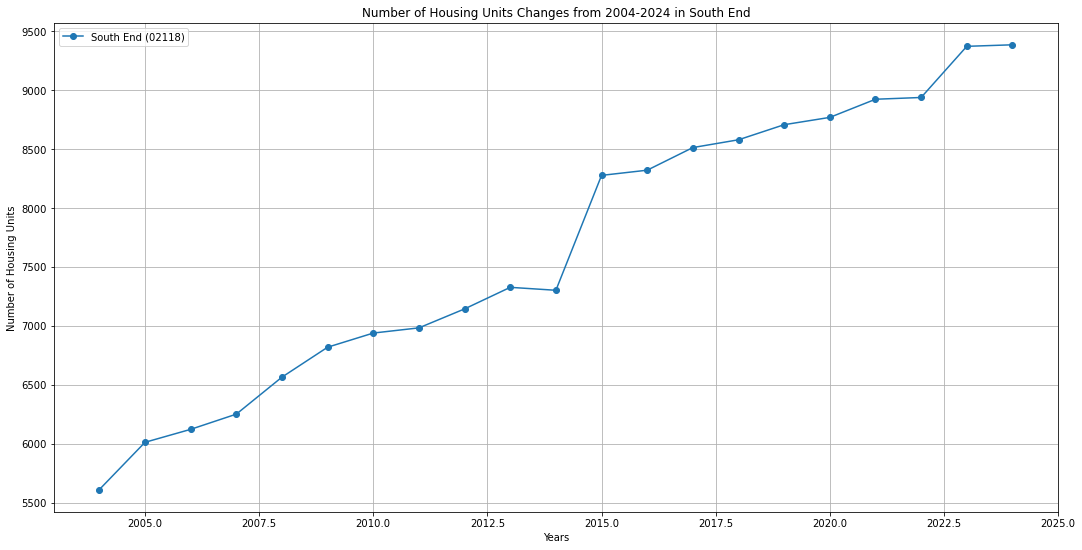

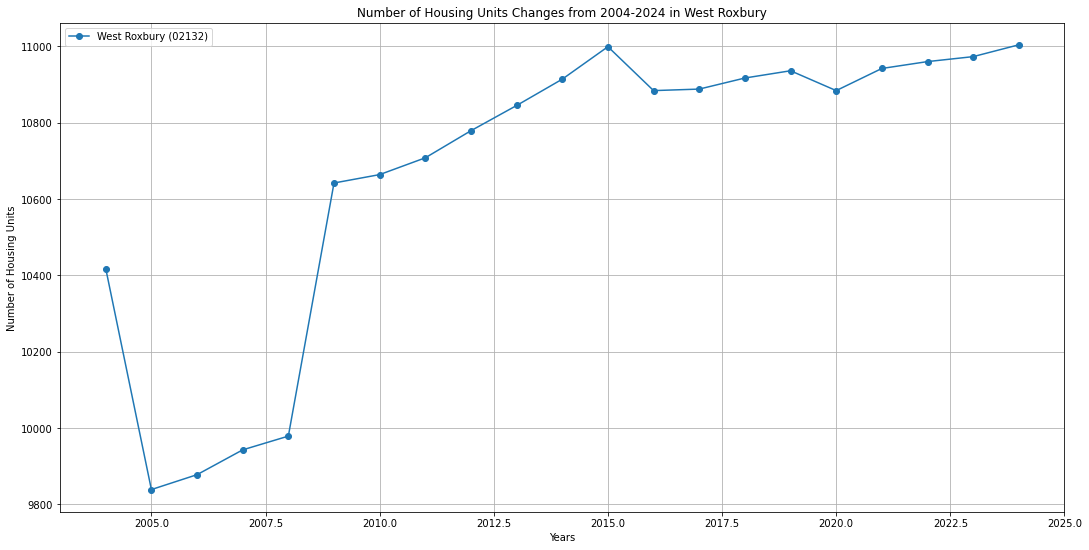

In [73]:
#Plot a graph for each neighborhood 
#(same neighborhood but different zip codes count in one graph)
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021, 2022, 2023, 2024]

for neighborhood in neighborhood_zip_codes:
    #Create a graph for each neighborhood
    plt.figure(figsize=(18, 9))
    
    for combination in neighborhood_zip_code_changes:
        current_neighborhood, zip_code = combination.rsplit(' ', 1)
        zip_code = zip_code.strip('()')
        
        #Check if the neighborhood of current combination matches current neighborhood
        if current_neighborhood == neighborhood:
            #Retrieve data and plot
            data = neighborhood_zip_code_changes[combination]    
            plt.plot(years, data, marker='o', label=f"{neighborhood} ({zip_code})")
            
    #label the graph and show
    plt.xlabel('Years')
    plt.ylabel('Number of Housing Units')
    plt.title(f'Number of Housing Units Changes from 2004-2024 in {neighborhood}')
    plt.grid(True)
    plt.legend()
    plt.show()
  

In [74]:
#Calculate the growth of each neighborhood (zip code) combination
all_changes = []
for combination in neighborhood_zip_code_changes:
    changes = neighborhood_zip_code_changes[combination][-1] - neighborhood_zip_code_changes[combination][0]
    all_changes.append([combination, changes])
    if changes >= 0:
        print(f"{combination} is building {changes} more housing units from 2004 to 2024")
    else:
        print(f"{combination} is losing {np.abs(changes)} housing units from 2004 to 2024")

Allston/Brighton (02134) is building 209 more housing units from 2004 to 2024
Allston/Brighton (02135) is building 2479 more housing units from 2004 to 2024
Allston/Brighton (02163) is building 0 more housing units from 2004 to 2024
Back Bay/Beacon Hill (02108) is building 307 more housing units from 2004 to 2024
Back Bay/Beacon Hill (02116) is building 1911 more housing units from 2004 to 2024
Back Bay/Beacon Hill (02117) is building 0 more housing units from 2004 to 2024
Back Bay/Beacon Hill (02123) is building 0 more housing units from 2004 to 2024
Back Bay/Beacon Hill (02133) is building 1 more housing units from 2004 to 2024
Back Bay/Beacon Hill (02199) is building 13 more housing units from 2004 to 2024
Back Bay/Beacon Hill (02216) is building 0 more housing units from 2004 to 2024
Back Bay/Beacon Hill (02217) is building 0 more housing units from 2004 to 2024
Back Bay/Beacon Hill (02295) is building 0 more housing units from 2004 to 2024
Central Boston (02101) is building 0 more

In [75]:
#Find out the community with the most housing units built/lost
max_building_units = 0
max_losing_units = 0
max_build_neighborhood = ''
max_lose_neighborhood = ''

for neighborhood, units in all_changes:
    if units >= 0:
        if units > max_building_units:
            max_building_units = units
            max_build_neighborhood = neighborhood
        else:
            continue
    else:
        if units < max_losing_units:
            max_losing_units = units
            max_lose_neighborhood = neighborhood
        else:
            continue
            
print(f"From 2004 to 2024, {max_build_neighborhood} is building the most housing units ({max_building_units} units)")
print(f"From 2004 to 2024, {max_lose_neighborhood} is losing the most housing units ({np.abs(max_losing_units)} units)")

From 2004 to 2024, South Boston (02127) is building the most housing units (6571 units)
From 2004 to 2024, Mattapan (02126) is losing the most housing units (978 units)
